In [ ]:
# Tên: Phan Nguyễn Thành Nhân
# MSSV: 19521943

# Cài đặt thư viện

In [ ]:
!pip install geopandas

# Git clone data

In [2]:
!git clone https://github.com/CityScope/CSL_HCMC

Cloning into 'CSL_HCMC'...
remote: Enumerating objects: 1930, done.
remote: Counting objects: 100% (590/590), done.
remote: Compressing objects: 100% (315/315), done.
remote: Total 1930 (delta 308), reused 500 (delta 269), pack-reused 1340
Receiving objects: 100% (1930/1930), 179.02 MiB | 24.75 MiB/s, done.
Resolving deltas: 100% (985/985), done.
Checking out files: 100% (542/542), done.


# Read data

In [3]:
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [88]:
data = gpd.read_file('/content/CSL_HCMC/Data/GIS/Population/population_HCMC/population_shapefile/Population_Ward_Level.shp')

In [89]:
data

,Com_Name,Dist_Name,Com_ID,Dist_ID,Level,Pop_2009,Pop_2019,Den_2009,Den_2019,Shape_Leng,Shape_Area,geometry
0,Tan Dinh,District 1,26734,760,Ward,26571.0,23258.0,41942.70,36713.10,3679.098196,6.334981e+05,"POLYGON ((684350.511 1193546.266, 684363.810 1..."
1,Ben Nghe,District 1,26740,760,Ward,13580.0,10633.0,5480.09,4290.86,6978.149149,2.478041e+06,"POLYGON ((686564.657 1193462.473, 686588.924 1..."
2,Cau Ong Lanh,District 1,26752,760,Ward,12917.0,10737.0,56878.90,47279.50,2260.705105,2.270938e+05,"POLYGON ((685922.373 1190479.807, 685914.160 1..."
3,Nguyen Thai Binh,District 1,26746,760,Ward,13197.0,9716.0,26798.80,19730.00,3320.174618,4.924426e+05,"POLYGON ((685966.333 1190513.667, 685944.353 1..."
4,Co Giang,District 1,26755,760,Ward,18967.0,11517.0,53327.60,32381.20,2525.453814,3.556650e+05,"POLYGON ((685514.573 1190211.431, 685547.521 1..."
...,...,...,...,...,...,...,...,...,...,...,...,...
317,Tan Hung Thuan,District 12,26787,761,Ward,28892.0,33467.0,16053.40,18595.50,6271.308704,1.799659e+06,"POLYGON ((677816.513 1197206.772, 677796.932 1..."
318,Ward 17,Go Vap,26875,764,Ward,44226.0,54728.0,38061.20,47099.30,6385.950275,1.161947e+06,"POLYGON ((683516.949 1200006.226, 683509.721 1..."
319,Ward 8,Go Vap,26898,764,Ward,26545.0,32778.0,22751.50,28093.70,5409.821020,1.166701e+06,"POLYGON ((680928.492 1199066.285, 680984.889 1..."
320,Ward 9,Go Vap,26897,764,Ward,26785.0,34596.0,31843.10,41129.20,3950.799798,8.411288e+05,"POLYGON ((681120.443 1199640.183, 681120.846 1..."


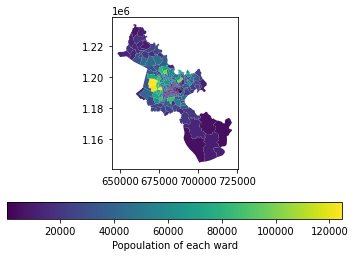

In [125]:
fig, ax = plt.subplots(1, 1)

data.plot(figsize=(12,20), column='Pop_2019', ax=ax, legend=True, legend_kwds={'label': "Popoulation of each ward", 'orientation': "horizontal"})

# Thao tác 1: Phường nào có diện tích lớn nhất

In [91]:
largest_ward = data[data.Shape_Area == data['Shape_Area'].max()]

In [92]:
largest_ward

,Com_Name,Dist_Name,Com_ID,Dist_ID,Level,Pop_2009,Pop_2019,Den_2009,Den_2019,Shape_Leng,Shape_Area,geometry
204,Ly Nhon,Can Gio,27682,787,Commune,5696.0,5266.0,35.3378,32.6701,68958.528608,1.611939e+08,"POLYGON ((703990.602 1160907.838, 704139.338 1..."


In [132]:
print(f'Phường có diện tích lớn nhất là phường {largest_ward.Com_Name.iloc[0]} huyện {largest_ward.Dist_Name.iloc[0]}')

Phường có diện tích lớn nhất là phường Ly Nhon huyện Can Gio


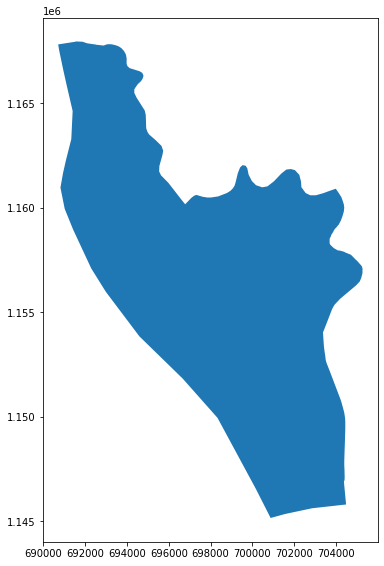

In [93]:
largest_ward.plot(figsize=(6, 10))

# Thao tác 2: Phường nào có diện tích nhỏ nhất

In [94]:
smallest_ward = data[data.Shape_Area == data['Shape_Area'].min()]

In [95]:
smallest_ward

,Com_Name,Dist_Name,Com_ID,Dist_ID,Level,Pop_2009,Pop_2019,Den_2009,Den_2019,Shape_Leng,Shape_Area,geometry
71,Ward 3,District 10,27205,771,Ward,7759.0,7245.0,76334.1,71277.3,1556.320657,101642.928821,"POLYGON ((682485.431 1189922.970, 682510.266 1..."


In [134]:
print(f'Phường có diện tích lớn nhất là {smallest_ward.Com_Name.iloc[0]} {smallest_ward.Dist_Name.iloc[0]}')

Phường có diện tích lớn nhất là Ward 3 District 10


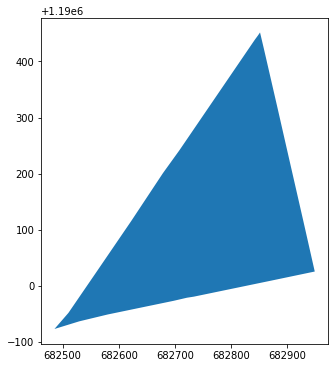

In [96]:
smallest_ward.plot(figsize=(10, 6))

# Thao tác 3: Phường nào có dân số 2019 cao nhất

In [97]:
crowded_ward_19 = data[data.Pop_2019 == data['Pop_2019'].max()]

In [98]:
crowded_ward_19

,Com_Name,Dist_Name,Com_ID,Dist_ID,Level,Pop_2009,Pop_2019,Den_2009,Den_2019,Shape_Leng,Shape_Area,geometry
168,Vinh Loc A,Binh Chanh,27601,785,Commune,49946.0,124709.0,2530.93,6319.41,19808.888559,1.973287e+07,"POLYGON ((669872.381 1199077.678, 669922.073 1..."


In [135]:
print(f'Phường có diện tích lớn nhất là phường {crowded_ward_19.Com_Name.iloc[0]} huyện {crowded_ward_19.Dist_Name.iloc[0]}')

Phường có diện tích lớn nhất là phường Vinh Loc A huyện Binh Chanh


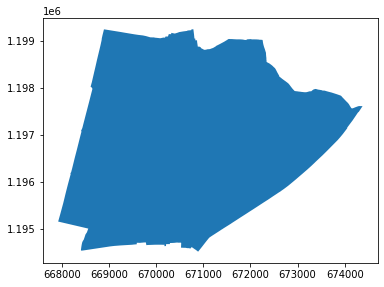

In [99]:
crowded_ward_19.plot(figsize=(6, 10))

# Thao tác 4: Phường nào có dân số 2019 thấp nhất

In [100]:
deserted_ward_19 = data[data.Pop_2019 == data['Pop_2019'].min()]

In [101]:
deserted_ward_19

,Com_Name,Dist_Name,Com_ID,Dist_ID,Level,Pop_2009,Pop_2019,Den_2009,Den_2019,Shape_Leng,Shape_Area,geometry
218,An Khanh,District 2,27106,769,Ward,15659.0,223.0,8830.98,125.762,6715.625464,1.773186e+06,"POLYGON ((688894.225 1192163.773, 688895.628 1..."


In [136]:
print(f'Phường có diện tích lớn nhất là phường {deserted_ward_19.Com_Name.iloc[0]} {deserted_ward_19.Dist_Name.iloc[0]}')

Phường có diện tích lớn nhất là phường An Khanh District 2


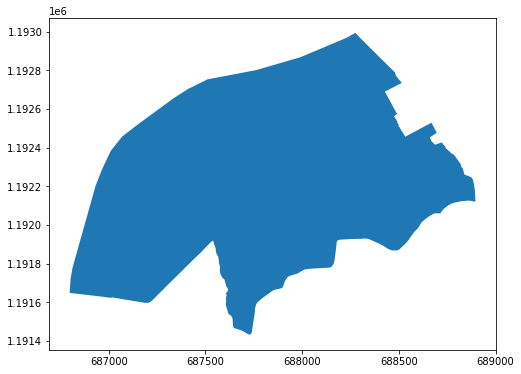

In [102]:
deserted_ward_19.plot(figsize=(8, 10))

# Thao tác 5: Phường nào có tốc độ tăng trưởng dân số nhanh nhất (dựa trên Pop_2009 và Pop_2019)

In [110]:
data['Pop_growRate'] = data['Pop_2019'] / data['Pop_2009']

In [111]:
high_growRate_ward = data[data.Pop_growRate == data['Pop_growRate'].max()]

In [112]:
high_growRate_ward

,Com_Name,Dist_Name,Com_ID,Dist_ID,Level,Pop_2009,Pop_2019,Den_2009,Den_2019,Shape_Leng,Shape_Area,geometry,Pop_Den_19,Pop_growRate
211,Phu Huu,District 9,26866,763,Ward,7265.0,22216.0,614.811,1880.06,18842.507391,1.181706e+07,"POLYGON ((694734.189 1193824.448, 694735.625 1...",0.00188,3.057949


In [137]:
print(f'Phường có diện tích lớn nhất là phường {high_growRate_ward.Com_Name.iloc[0]} {high_growRate_ward.Dist_Name.iloc[0]}')

Phường có diện tích lớn nhất là phường Phu Huu District 9


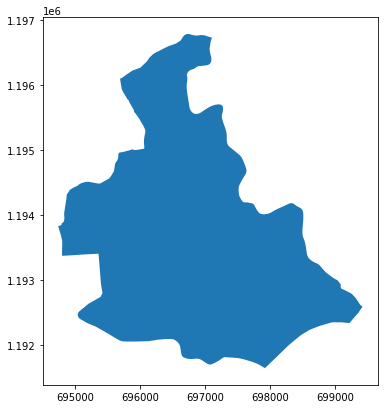

In [113]:
high_growRate_ward.plot(figsize=(6, 10))

# Thao tác 6: Phường nào có tốc độ tăng trưởng dân số thấp nhất (dựa trên Pop_2009 và Pop_2019)

In [114]:
low_growRate_ward = data[data.Pop_growRate == data['Pop_growRate'].min()]

In [115]:
low_growRate_ward

,Com_Name,Dist_Name,Com_ID,Dist_ID,Level,Pop_2009,Pop_2019,Den_2009,Den_2019,Shape_Leng,Shape_Area,geometry,Pop_Den_19,Pop_growRate
218,An Khanh,District 2,27106,769,Ward,15659.0,223.0,8830.98,125.762,6715.625464,1.773186e+06,"POLYGON ((688894.225 1192163.773, 688895.628 1...",0.000126,0.014241


In [138]:
print(f'Phường có diện tích lớn nhất là phường {low_growRate_ward.Com_Name.iloc[0]} {low_growRate_ward.Dist_Name.iloc[0]}')

Phường có diện tích lớn nhất là phường An Khanh District 2


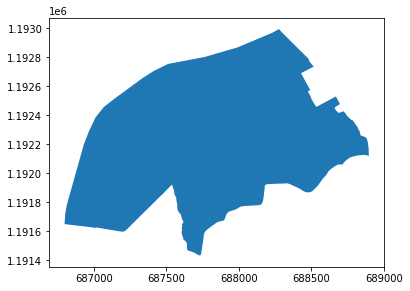

In [116]:
low_growRate_ward.plot(figsize=(6, 10))

# Thao tác 7: Phường nào có biến động dân số nhanh nhất (dựa trên Pop_2009 và Pop_2019)

In [117]:
data['Pop_changePace'] = data['Pop_2019'] - data['Pop_2009']

In [118]:
high_changePace_ward = data[data.Pop_changePace == data['Pop_changePace'].max()]

In [119]:
high_changePace_ward

,Com_Name,Dist_Name,Com_ID,Dist_ID,Level,Pop_2009,Pop_2019,Den_2009,Den_2019,Shape_Leng,Shape_Area,geometry,Pop_Den_19,Pop_growRate,Pop_changePace
168,Vinh Loc A,Binh Chanh,27601,785,Commune,49946.0,124709.0,2530.93,6319.41,19808.888559,1.973287e+07,"POLYGON ((669872.381 1199077.678, 669922.073 1...",0.00632,2.496877,74763.0


In [139]:
print(f'Phường có diện tích lớn nhất là phường {high_changePace_ward.Com_Name.iloc[0]} huyện {high_changePace_ward.Dist_Name.iloc[0]}')

Phường có diện tích lớn nhất là phường Vinh Loc A huyện Binh Chanh


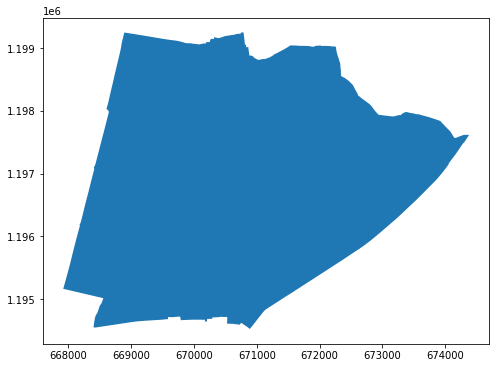

In [120]:
high_changePace_ward.plot(figsize=(8, 10))

# Thao tác 8: Phường nào có biến động dân số chậm nhất (dựa trên Pop_2009 và Pop_2019)

In [121]:
low_changePace_ward = data[data.Pop_changePace == data['Pop_changePace'].min()]

In [122]:
low_changePace_ward

,Com_Name,Dist_Name,Com_ID,Dist_ID,Level,Pop_2009,Pop_2019,Den_2009,Den_2019,Shape_Leng,Shape_Area,geometry,Pop_Den_19,Pop_growRate,Pop_changePace
218,An Khanh,District 2,27106,769,Ward,15659.0,223.0,8830.98,125.762,6715.625464,1.773186e+06,"POLYGON ((688894.225 1192163.773, 688895.628 1...",0.000126,0.014241,-15436.0


In [140]:
print(f'Phường có diện tích lớn nhất là phường {low_changePace_ward.Com_Name.iloc[0]} {low_changePace_ward.Dist_Name.iloc[0]}')

Phường có diện tích lớn nhất là phường An Khanh District 2


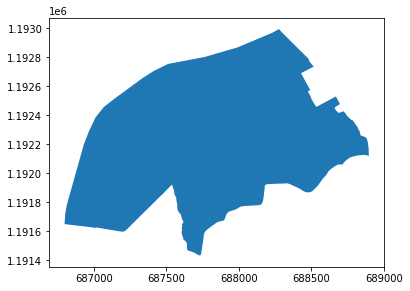

In [123]:
low_changePace_ward.plot(figsize=(6, 10))

# Thao tác 9: Phường nào có mật độ dân số cao nhất 2019

In [103]:
data['Pop_Den_19'] = data['Pop_2019'] / data['Shape_Area']

In [104]:
high_PopDen19_ward = data[data.Pop_Den_19 == data['Pop_Den_19'].max()]

In [105]:
high_PopDen19_ward

,Com_Name,Dist_Name,Com_ID,Dist_ID,Level,Pop_2009,Pop_2019,Den_2009,Den_2019,Shape_Leng,Shape_Area,geometry,Pop_Den_19
16,Ward 8,District 4,27268,773,Ward,16221.0,15321.0,101839.0,96188.7,2623.543439,159274.140239,"POLYGON ((686132.663 1190298.153, 686136.360 1...",0.096193


In [141]:
print(f'Phường có diện tích lớn nhất là {high_PopDen19_ward.Com_Name.iloc[0]} {high_PopDen19_ward.Dist_Name.iloc[0]}')

Phường có diện tích lớn nhất là Ward 8 District 4


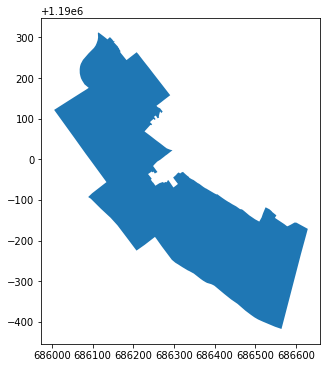

In [106]:
high_PopDen19_ward.plot(figsize=(10, 6))

# Thao tác 10: Phường nào có mật độ dân số thấp nhất 2019

In [107]:
low_PopDen19_ward = data[data.Pop_Den_19 == data['Pop_Den_19'].min()]

In [108]:
low_PopDen19_ward

,Com_Name,Dist_Name,Com_ID,Dist_ID,Level,Pop_2009,Pop_2019,Den_2009,Den_2019,Shape_Leng,Shape_Area,geometry,Pop_Den_19
204,Ly Nhon,Can Gio,27682,787,Commune,5696.0,5266.0,35.3378,32.6701,68958.528608,1.611939e+08,"POLYGON ((703990.602 1160907.838, 704139.338 1...",0.000033


In [142]:
print(f'Phường có diện tích lớn nhất là phường {low_PopDen19_ward.Com_Name.iloc[0]} quận {low_PopDen19_ward.Dist_Name.iloc[0]}')

Phường có diện tích lớn nhất là phường Ly Nhon quận Can Gio


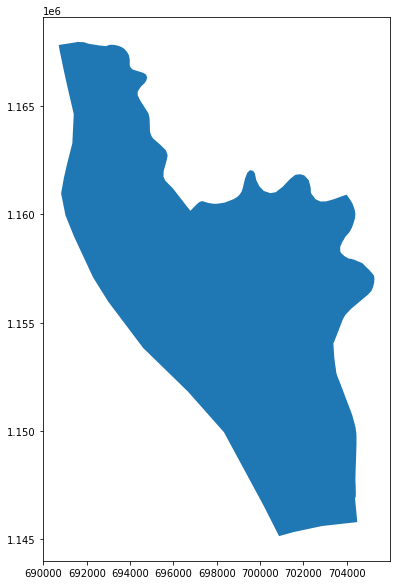

In [109]:
low_PopDen19_ward.plot(figsize=(8, 10))